

***Bike store sales***

***Let's put in practice the topics covered in the (INE) course and analyze sales made in a Bike Shop.***

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('sales_data.csv')

<span style="color: purple; font-size: 20px;font-weight: bold">First look at our data : </span>

In [6]:
sales.shape

(5000, 16)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [8]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [9]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25



<span style="color: purple; font-size: 20px;font-weight: bold">Fixing column types : </span>

    ● Cast Date to datetime.
    ● Cast Customer_Gender, Country, State, Product_Category and Sub_Category to category.



In [12]:
sales['Date']= pd.to_datetime(sales['Date'])

In [25]:
for col in ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']:
    sales[col] = sales[col].astype('category')

In [27]:
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

<span style="color: purple; font-size: 20px;font-weight: bold">Get a summary of the main statistics of the whole data : </span>


In [28]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


<span style="color: purple; font-size: 20px;font-weight: bold">What's the mean of Customers_Age? : </span>


In [29]:
sales['Customer_Age'].mean()

35.9338

<AxesSubplot:ylabel='Density'>

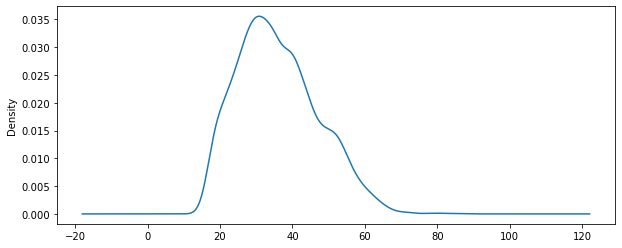

In [38]:
sales['Customer_Age'].plot.kde( figsize=(10,4))

<AxesSubplot:>

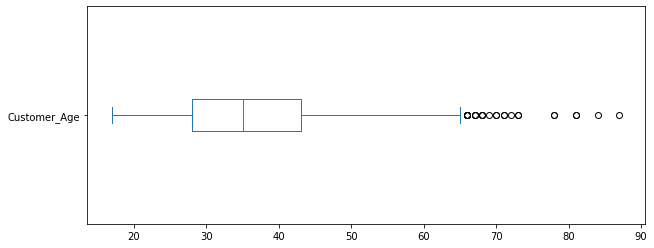

In [37]:
sales['Customer_Age'].plot.box( vert=False, figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">What's the mean of Order_Quantity?  </span>


In [39]:
sales['Order_Quantity'].mean()

11.8204

<AxesSubplot:ylabel='Frequency'>

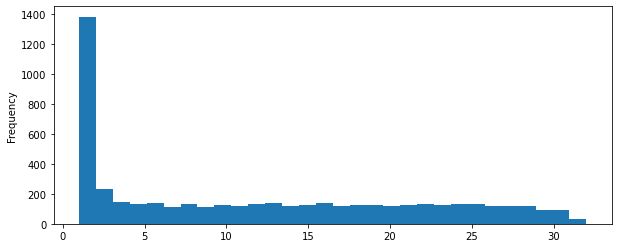

In [43]:
sales['Order_Quantity'].plot.hist( bins=30, figsize=(10,4))

<AxesSubplot:>

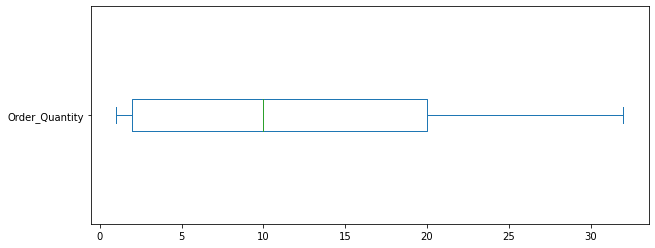

In [45]:
sales['Order_Quantity'].plot.box(vert=False, figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">In which countries were sales made?  </span>


In [47]:
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

<span style="color: purple; font-size: 20px;font-weight: bold">Sort sales by year  </span>


In [48]:
sales.sort_values(['Year'], ascending=False, inplace=True)

In [49]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
3962,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
3902,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
3886,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437
3888,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,4
1571,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35,390,624


<span style="color: purple; font-size: 20px;font-weight: bold">Reset the current index</span>


In [50]:
sales.reset_index(drop=True, inplace=True)
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
1,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
2,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437
3,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,4
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35,390,624


<span style="color: purple; font-size: 20px;font-weight: bold">How many sales per year do we have?</span>


In [56]:
sales['Year'].value_counts()

2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

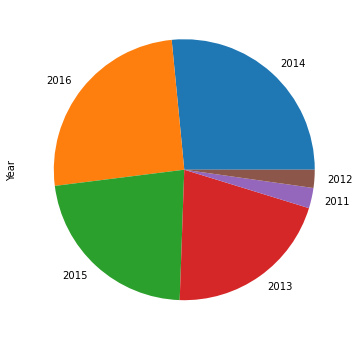

In [59]:
sales['Year'].value_counts().plot.pie( figsize=(6,6))

<AxesSubplot:>

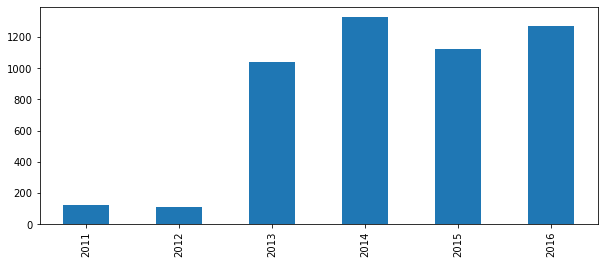

In [60]:
sales['Year'].value_counts().sort_index().plot.bar( figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">Create a new Cost column</span>


In [62]:
sales['Cost']= sales['Unit_Cost'] * sales['Order_Quantity']
sales['Cost']

0        325
1         32
2        169
3          2
4        234
        ... 
4995     344
4996     688
4997    1266
4998    1266
4999    4665
Name: Cost, Length: 5000, dtype: int64

<span style="color: purple; font-size: 20px;font-weight: bold">Create a new YearMonth column</span>


In [63]:
sales['YearMonth'] = sales['Year'].astype('str') + '-' + sales['Month']
sales['YearMonth']

0           2016-July
1            2016-May
2          2016-March
3        2016-January
4           2016-June
            ...      
4995       2011-March
4996    2011-December
4997        2011-July
4998    2011-December
4999         2011-May
Name: YearMonth, Length: 5000, dtype: object

<span style="color: purple; font-size: 20px;font-weight: bold">How did sales evolve through the years?

Count how many sales we have per YearMonth.</span>


In [64]:
sales['YearMonth'].value_counts()

2015-December    232
2016-April       218
2014-June        215
2013-December    215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: YearMonth, Length: 62, dtype: int64

<AxesSubplot:>

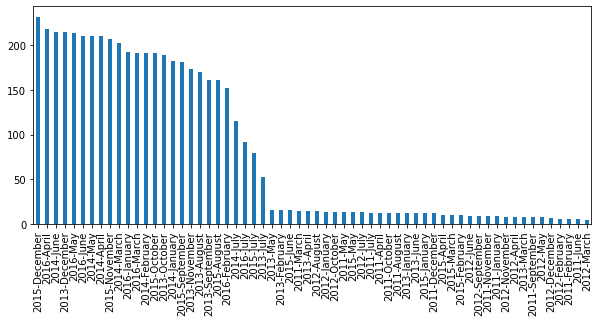

In [68]:
sales['YearMonth'].value_counts().plot.bar(figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">Which country has the most sales quantity of sales?</span>


In [70]:
sales['Country'].value_counts().head(1)

United States    1700
Name: Country, dtype: int64

In [71]:
sales['Country'].value_counts()

United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: Country, dtype: int64

<AxesSubplot:>

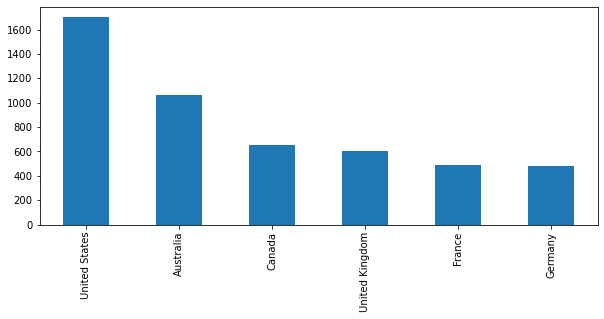

In [72]:
sales['Country'].value_counts().plot.bar( figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">Get a list of every product sold</span>


In [74]:
sales['Product'].unique()

array(['Sport-100 Helmet, Red', 'Water Bottle - 30 oz.',
       'Sport-100 Helmet, Blue', 'Sport-100 Helmet, Black',
       'Patch Kit/8 Patches', 'Hitch Rack - 4-Bike', 'Road Tire Tube',
       'ML Mountain Tire', 'Mountain-400-W Silver, 42',
       'Touring Tire Tube', 'Fender Set - Mountain',
       'Touring-3000 Blue, 62', 'AWC Logo Cap',
       'Long-Sleeve Logo Jersey, L', 'Bike Wash - Dissolver',
       'Mountain-200 Silver, 46', 'Road-150 Red, 52', 'LL Mountain Tire',
       'Road-150 Red, 44', 'Road Bottle Cage', 'LL Road Tire',
       'Touring-1000 Yellow, 60', 'HL Road Tire', 'Mountain Tire Tube',
       'Touring-3000 Blue, 44', 'Short-Sleeve Classic Jersey, L',
       'Touring-1000 Blue, 50', 'HL Mountain Tire',
       'Half-Finger Gloves, L', 'Half-Finger Gloves, M',
       'Racing Socks, M', 'Road-650 Red, 52', 'ML Road Tire',
       'Mountain-400-W Silver, 40', 'Mountain-200 Silver, 42',
       'Long-Sleeve Logo Jersey, XL', 'Touring-1000 Yellow, 54',
       'Hydration P

<AxesSubplot:>

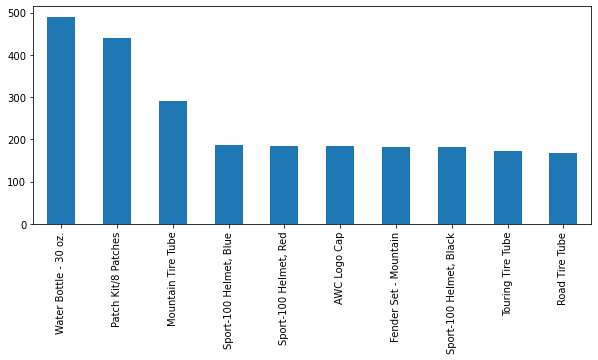

In [75]:
sales['Product'].value_counts().head(10).plot.bar( figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">relationship between Unit_Cost and Unit_Price</span>


<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

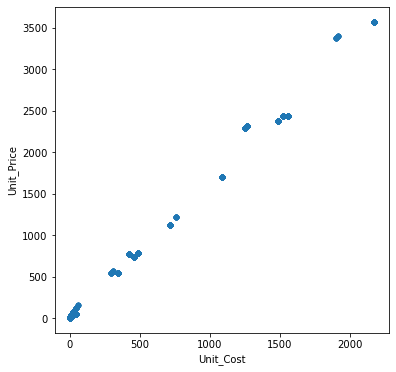

In [76]:
sales.plot.scatter(x='Unit_Cost', y='Unit_Price', figsize=(6,6))

<span style="color: purple; font-size: 20px;font-weight: bold">relationship between Order_Quantity and Profit</span>


<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

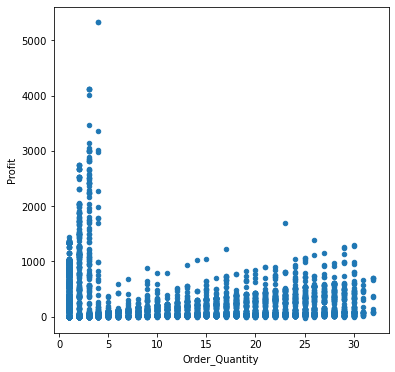

In [77]:
sales.plot.scatter(x='Order_Quantity', y='Profit', figsize=(6,6))

<span style="color: purple; font-size: 20px;font-weight: bold">relationship between Profit per Country</span>


<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

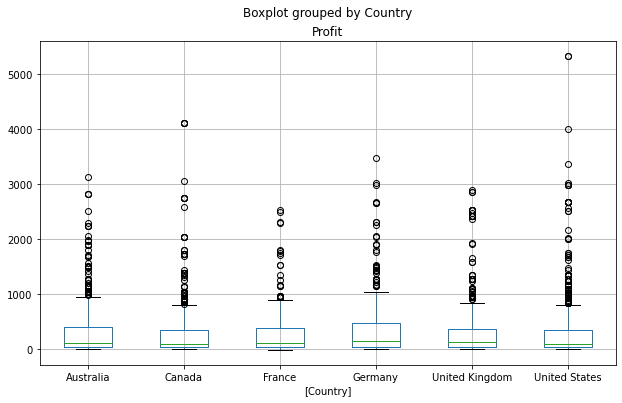

In [78]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

<span style="color: purple; font-size: 20px;font-weight: bold">relationship between the Customer_Age per Country</span>


<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

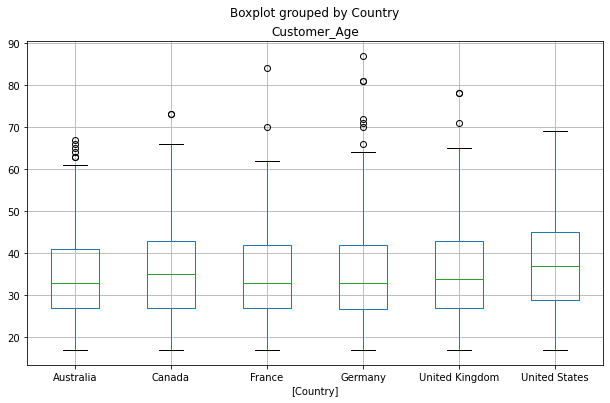

In [79]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

<span style="color: purple; font-size: 20px;font-weight: bold">Increase 50 U$S revenue to every sale</span>


In [80]:
sales['Revenue'] += 50

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made in Canada or France?</span>


In [86]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

1146

<span style="color: purple; font-size: 20px;font-weight: bold">How many Bike Racks orders were made from Canada?</span>


In [88]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

3

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made in each region (state) of France?</span>


In [89]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

Seine (Paris)          101
Seine Saint Denis       87
Nord                    76
Yveline                 48
Hauts de Seine          41
Essonne                 40
Seine et Marne          16
Moselle                 16
Loiret                  13
Val d'Oise              11
Garonne (Haute)         10
Charente-Maritime       10
Pas de Calais            6
Val de Marne             5
Loir et Cher             5
Somme                    4
South Australia          0
Brandenburg              0
California               0
Tasmania                 0
Texas                    0
Saarland                 0
Utah                     0
Victoria                 0
Washington               0
British Columbia         0
Ohio                     0
Queensland               0
Oregon                   0
Nordrhein-Westfalen      0
Bayern                   0
New York                 0
New South Wales          0
Missouri                 0
Kentucky                 0
Hessen                   0
Hamburg                  0
G

<AxesSubplot:>

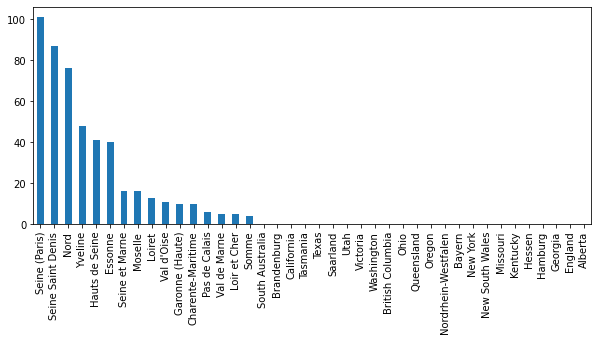

In [90]:
france_states.plot(kind='bar', figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">How many sales were made per category?</span>


In [91]:
sales['Product_Category'].value_counts()

Accessories    3090
Bikes          1166
Clothing        744
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

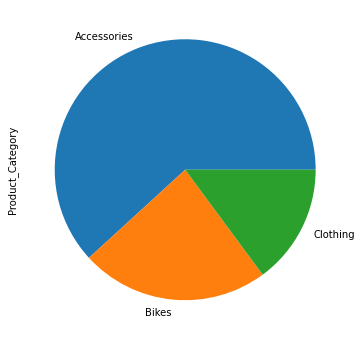

In [92]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made per accessory sub-categories?</span>


In [93]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Gloves                  0
Jerseys                 0
Mountain Bikes          0
Road Bikes              0
Shorts                  0
Socks                   0
Caps                    0
Touring Bikes           0
Vests                   0
Name: Sub_Category, dtype: int64

<AxesSubplot:>

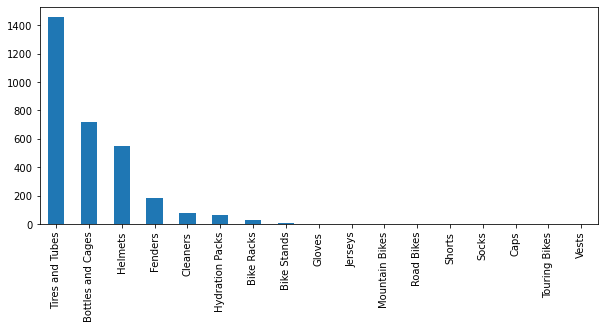

In [94]:
accessories.plot(kind='bar', figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made per bike sub-categories?</span>


In [95]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Jerseys                0
Tires and Tubes        0
Socks                  0
Shorts                 0
Hydration Packs        0
Bike Stands            0
Helmets                0
Gloves                 0
Fenders                0
Cleaners               0
Caps                   0
Bottles and Cages      0
Vests                  0
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

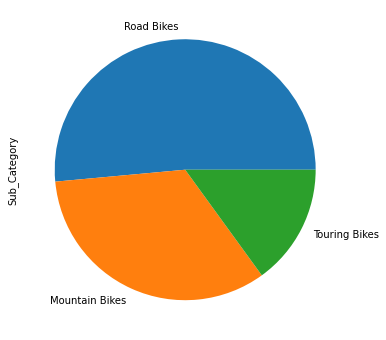

In [96]:
bikes.plot(kind='pie', figsize=(6,6))

<span style="color: purple; font-size: 20px;font-weight: bold">Which gender has the most amount of sales?</span>


In [98]:
sales['Customer_Gender'].value_counts()

M    2564
F    2436
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

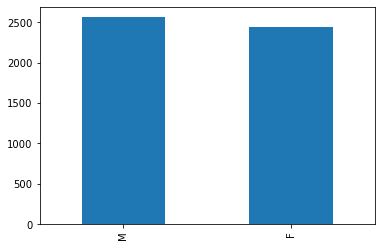

In [97]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

<span style="color: purple; font-size: 20px;font-weight: bold">How many sales with more than 500 in Revenue were made by men?</span>


In [99]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

1

<span style="color: purple; font-size: 20px;font-weight: bold">Get the top-5 sales with the highest revenue</span>


In [100]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4986,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
4959,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011-December
1689,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December
678,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016-January


<span style="color: purple; font-size: 20px;font-weight: bold">Get the sale with the highest revenue</span>


In [101]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January


<span style="color: purple; font-size: 20px;font-weight: bold">What is the mean Order_Quantity of orders with more than 10K in revenue?</span>


In [102]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

3.25

<span style="color: purple; font-size: 20px;font-weight: bold">What is the mean Order_Quantity of orders with less than 10K in revenue?</span>


In [103]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

11.834134615384615

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made in May of 2016?</span>


In [104]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

214

<span style="color: purple; font-size: 20px;font-weight: bold">How many orders were made between May and July of 2016?</span>


In [105]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

517

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

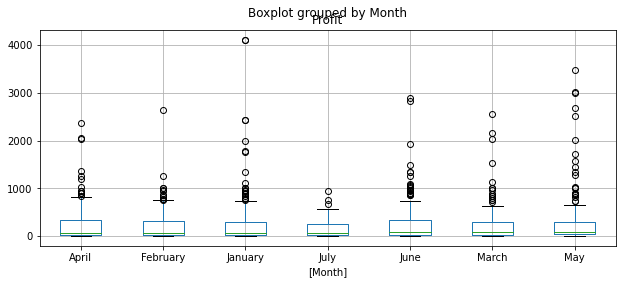

In [106]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(10,4))

<span style="color: purple; font-size: 20px;font-weight: bold">Add 7.2% TAX on every sale Unit_Price within United States</span>


In [107]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

In [108]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,37.52,533,908,325,2016-July
1,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5.36,46,128,32,2016-May
2,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35.00,268,487,169,2016-March
3,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5.00,2,54,2,2016-January
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35.00,390,674,234,2016-June
